# 1. Template Matching Using cv2.matchTemplate in OpenCV 

Traditional Computer Vision technique is rule-based. It uses handcrafted algorithms to extract features (edges, corners, colors, textures).

No learning—relies on explicit programming.

For instance, cv2.TM_CCOEFF_NORMED, Normalized Cross-Correlation Coefficient, measures how similar a template image is to different regions of a target image by computing a correlation score between them. It can find a small template image within a larger target image, by sliding the template over the target, computing a similarity metric at each position, and eventually returning a result map showing matches.

Drawback(of most Traditional Computer Vision techniques): Works in controlled conditions. Very subject to noise(pixel-level noise, irrevalent patterns in target image, geometric deformations). cv2.matchTemplate is pixel-based, it compares raw pixel values and thus it depends on very accurate pixel-matching. 

In [1]:
import cv2
import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
from PIL import Image

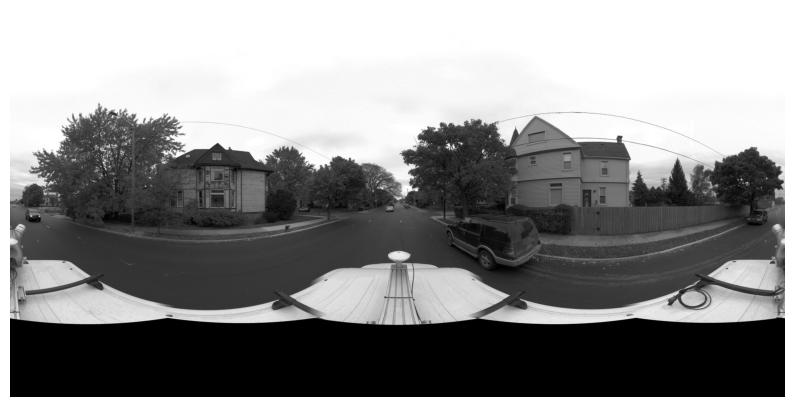

In [3]:
# Load target and template images (grayscale)
img = cv2.imread('/Users/sunyao/desktop/Forest_Ave.jpg', 0)
plt.figure(figsize=(10, 8))
plt.imshow(img, cmap='gray') # It works better in gray as CV algorithms need single values and edges work better in grayscale
plt.axis('off')
plt.show()

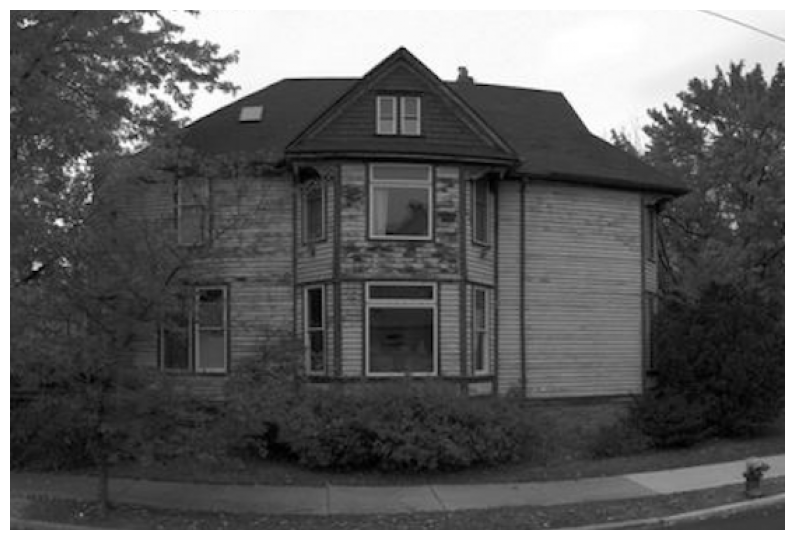

In [4]:
template = cv2.imread('/Users/sunyao/desktop/template.jpg', 0)
plt.figure(figsize=(10, 8))
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
h, w = template.shape 
h, w

(372, 554)

In [6]:
# Apply template matching
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

In [7]:
# Find the best matched location
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [8]:
top_left = max_loc # For TM_CCOEFF_NORMED, use max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)  # w, h from template.shape
cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)  # Green rectangle

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]],
      shape=(1024, 2048), dtype=uint8)

In [ ]:
# Draw a rectangle around the matched region
"""
cv2.rectangle(img, top_left, bottom_right, 255, 2)
cv2.imshow('Result', img)
cv2.waitKey(0)
"""

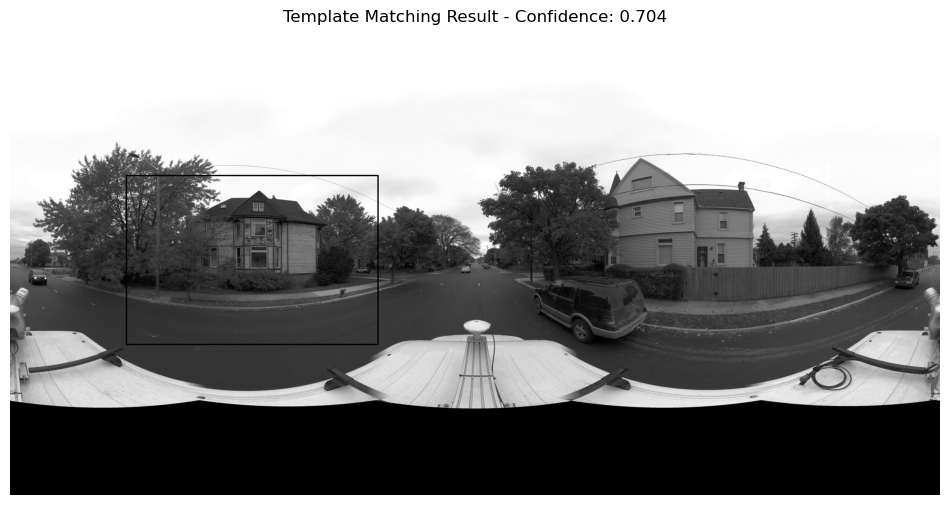

Best match location: (256, 320)
Match confidence: 0.704


In [9]:
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Template Matching Result - Confidence: {max_val:.3f}')
plt.show()

print(f"Best match location: {top_left}")
print(f"Match confidence: {max_val:.3f}")

# 2.  Deep Learning-Based Approaches

# PyTorch is an open-source deep learning framework developed by Meta. 

# YOLO(You Only Look Once) is built on PyTorch. It's a unified computer vision framework that can handle object detection. When you use libraries like Ultralytics, you're actually working with PyTorch tensors and models behind the scenes.

# YOLO's key concept is divide the image into a grid and simultaneously predicts: -What objects are present, -Where they are located, -How confident the prediction is. 

# Regular YOLO, "model = YOLO('yolov8n.pt')", can only detect pre-trained classes (usually 80 COCO classes), cannot detect new objects without retraining

# YOLOWorld (Open-Vocabulary), can detect any object you describe in text, "model = YOLOWorld('yolov8s-world.pt') + model.set_classes(['custom', 'classes'])" 

In [10]:
# YOLO 
# https://github.com/ultralytics/ultralytics
!pip install -q ultralytics 

In [11]:
from ultralytics import YOLOWorld 

In [14]:
from ultralytics import YOLO

In [12]:
import torch

# YOLOv8n is the smallest variant, pre-trained on the dataset of 80 classes like person, car, dog, etc. It's based on fixed object detection - can only detect the 80 COCO classes. 

~3.2M parameters, fastest, lowest accuracy

In [ ]:
# Load image as tensor. Note: only convert to proper PyTorch tensor format when batch processing multiple images. 
"""
img = cv2.imread('/Users/sunyao/desktop/Forest_Ave.jpg')
img_tensor = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Run inference
with torch.no_grad():
    results = model_n(img_tensor)
"""

In [15]:
model_n = YOLO('yolov8n.pt')


image 1/1 /Users/sunyao/desktop/Forest_Ave.jpg: 320x640 1 car, 1 umbrella, 123.4ms
Speed: 5.3ms preprocess, 123.4ms inference, 5.2ms postprocess per image at shape (1, 3, 320, 640)


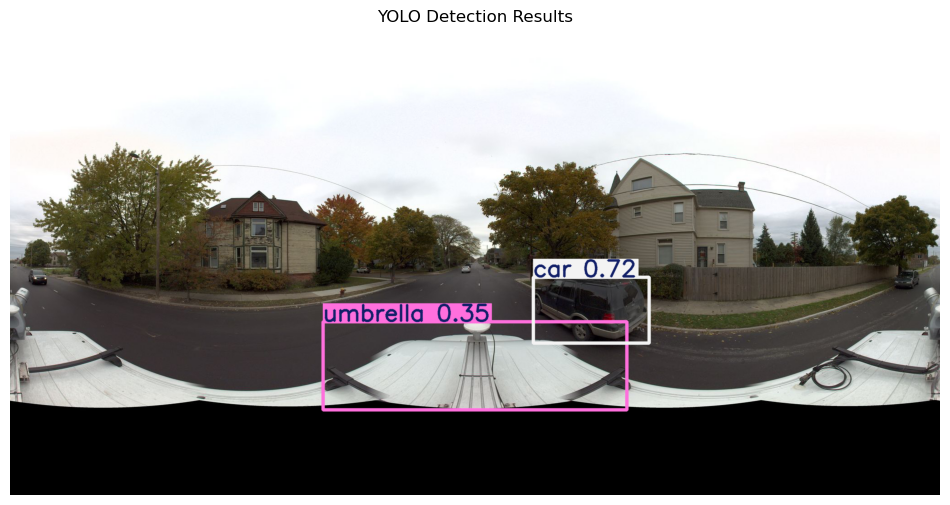

"\nfor r in results:\n    im_array = r.plot()  # Get image with bounding boxes drawn\n    im = Image.fromarray(im_array[..., ::-1])  # Convert BGR to RGB\n    plt.figure(figsize=(12, 8))\n    plt.imshow(im)\n    plt.axis('off')\n    plt.title('YOLOv8 Detection Results')\n    plt.show()\n"

In [18]:
# quick visualization 
result = model_n('/Users/sunyao/desktop/Forest_Ave.jpg')
for r in result:
    #r.show() 
    annotated_img = r.plot()
    plt.figure(figsize=(12, 8))
    plt.imshow(annotated_img[..., ::-1])  # Convert BGR to RGB
    plt.axis('off')
    plt.title('YOLO Detection Results')
    plt.show()

"""
for r in results:
    im_array = r.plot()  # Get image with bounding boxes drawn
    im = Image.fromarray(im_array[..., ::-1])  # Convert BGR to RGB
    plt.figure(figsize=(12, 8))
    plt.imshow(im)
    plt.axis('off')
    plt.title('YOLOv8 Detection Results')
    plt.show()
"""

# Check what classes YOLOv8 can detect

In [20]:
print("YOLOv8 can detect these classes:")
for i, class_name in model_n.names.items():
    print(f"{i}: {class_name}")

YOLOv8 can detect these classes:
0: person
1: bicycle
2: car
3: motorcycle
4: airplane
5: bus
6: train
7: truck
8: boat
9: traffic light
10: fire hydrant
11: stop sign
12: parking meter
13: bench
14: bird
15: cat
16: dog
17: horse
18: sheep
19: cow
20: elephant
21: bear
22: zebra
23: giraffe
24: backpack
25: umbrella
26: handbag
27: tie
28: suitcase
29: frisbee
30: skis
31: snowboard
32: sports ball
33: kite
34: baseball bat
35: baseball glove
36: skateboard
37: surfboard
38: tennis racket
39: bottle
40: wine glass
41: cup
42: fork
43: knife
44: spoon
45: bowl
46: banana
47: apple
48: sandwich
49: orange
50: broccoli
51: carrot
52: hot dog
53: pizza
54: donut
55: cake
56: chair
57: couch
58: potted plant
59: bed
60: dining table
61: toilet
62: tv
63: laptop
64: mouse
65: remote
66: keyboard
67: cell phone
68: microwave
69: oven
70: toaster
71: sink
72: refrigerator
73: book
74: clock
75: vase
76: scissors
77: teddy bear
78: hair drier
79: toothbrush



image 1/1 /Users/sunyao/desktop/Forest_Ave.jpg: 320x640 1 person, 3 cars, 100.2ms
Speed: 2.7ms preprocess, 100.2ms inference, 7.8ms postprocess per image at shape (1, 3, 320, 640)


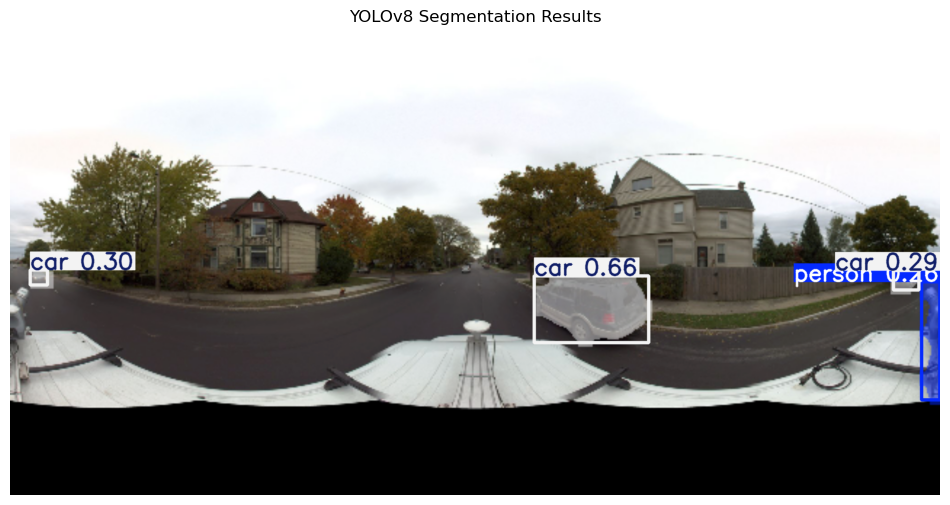

In [22]:
# YOLO segmentation detects objects AND creates pixel-perfect masks for each object. 
seg_model = YOLO('yolov8n-seg.pt')
seg_results = seg_model('/Users/sunyao/desktop/Forest_Ave.jpg')
#seg_results[0].show()
annotated_img = seg_results[0].plot()
plt.figure(figsize=(12, 8))
plt.imshow(annotated_img[..., ::-1])  # Convert BGR to RGB
plt.axis('off')
plt.title('YOLOv8 Segmentation Results')
plt.show()

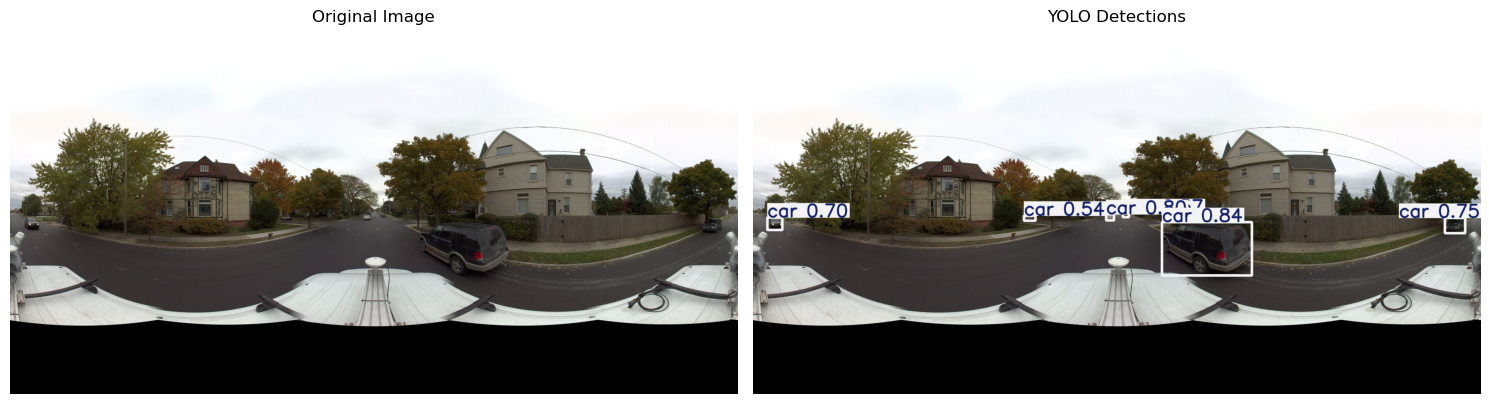

In [71]:
# Original and annotated images
annotated_img = results[0].plot()

# Display side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
ax2.set_title('YOLO Detections')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Now let's switch to YOLOWorld, where we can define objects we want to detect using natural language. This uses vision-language understanding to detect objects not in original training data. 

YOLOv8s is larger, ~11.2M parameters, good balance

In [25]:
model_s = YOLOWorld('yolov8s-world.pt')

In [41]:
custom_classes = ["blighted house", "residential house", "small house",
                "residential building", "residential apartment",
                  "family home", "single-family home", "property",
                  "front door", "window", "house with red roof", "house with front porch", "two story house with garage"]

In [42]:
# Set the custom classes
model_s.set_classes(custom_classes)

In [43]:
results = model_s('/Users/sunyao/desktop/Forest_Ave.jpg', conf=0.1)


image 1/1 /Users/sunyao/desktop/Forest_Ave.jpg: 320x640 1 house with red roof, 3 two story house with garages, 128.6ms
Speed: 4.9ms preprocess, 128.6ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)


Found 4 objects


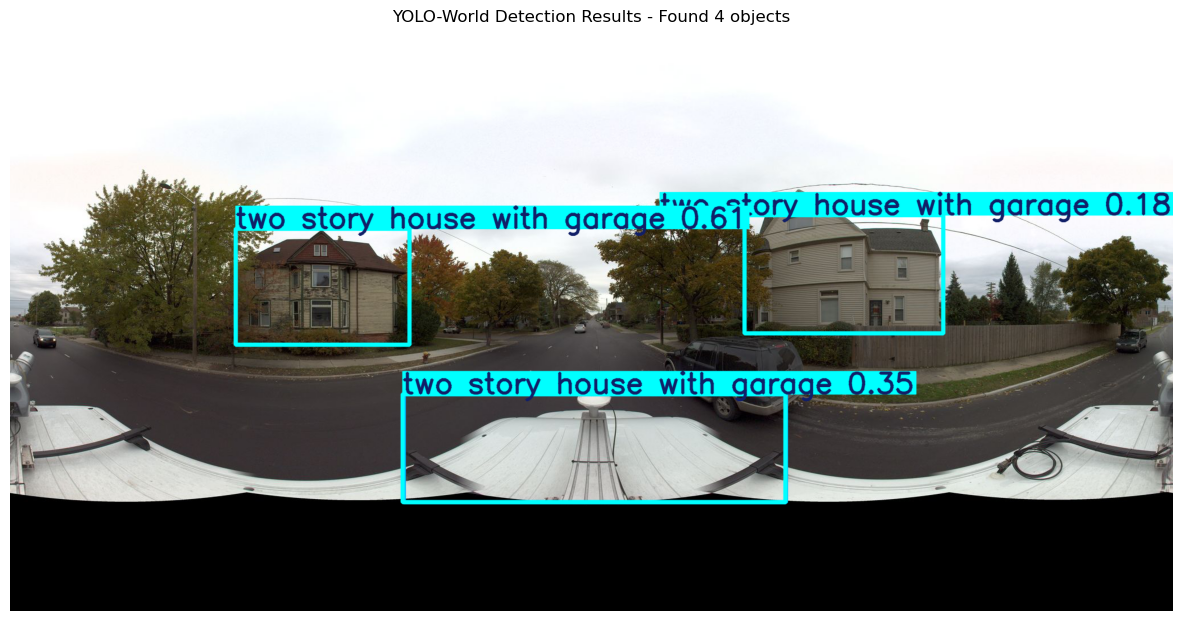

Annotated image saved as 'Forest_Ave_yolo_world.jpg'


In [44]:
for r in results:
    if r.boxes is not None:
        print(f"Found {len(r.boxes)} objects")
        
        for i, box in enumerate(r.boxes):  # ✅ Added enumerate and i
            conf = float(box.conf[0])
            cls = int(box.cls[0]) 
            
            if cls < len(custom_classes):
                class_name = custom_classes[cls]
            else:
                class_name = f"Unknown_class_{cls}"
            
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            
            #print(f"Detection {i+1}:")
            #print(f"  Object: {class_name}")
            #print(f"  Confidence: {conf:.3f}")  # ✅ Changed confidence to conf
            #print(f"  Box: ({x1:.1f}, {y1:.1f}) to ({x2:.1f}, {y2:.1f})")
            #print()
        
        # Visualize results
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])  # Convert BGR to RGB
        plt.figure(figsize=(15, 10))
        plt.imshow(im)
        plt.axis('off')
        plt.title(f'YOLO-World Detection Results - Found {len(r.boxes)} objects')
        plt.show()
        
        # Save annotated image
        r.save('/Users/sunyao/desktop/Forest_Ave_yolo_world.jpg')
        print("Annotated image saved as 'Forest_Ave_yolo_world.jpg'")
        
    else:
        print("No objects detected")


YOLOv8l has ~43.7M parameters, assumbly very high accuracy

In [45]:
model_l = YOLO('yolov8l-world.pt')

In [46]:
arch_classes = ["blighted house", "residential house", "small house",
                "residential building", "residential apartment",
                  "family home", "single-family home", "property",
                  "front door", "window", "house with red roof", "house with front porch", "two story house with garage"]

In [47]:
model_l.set_classes(arch_classes)
arch_results = model_l('/Users/sunyao/desktop/Forest_Ave.jpg', conf=0.01)


image 1/1 /Users/sunyao/desktop/Forest_Ave.jpg: 320x640 1 window, 5 two story house with garages, 280.4ms
Speed: 2.0ms preprocess, 280.4ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 640)


Architecture-focused detections: 6 objects
  two story house with garage: 0.085
  two story house with garage: 0.073
  window: 0.045
  two story house with garage: 0.017
  two story house with garage: 0.013
  two story house with garage: 0.012


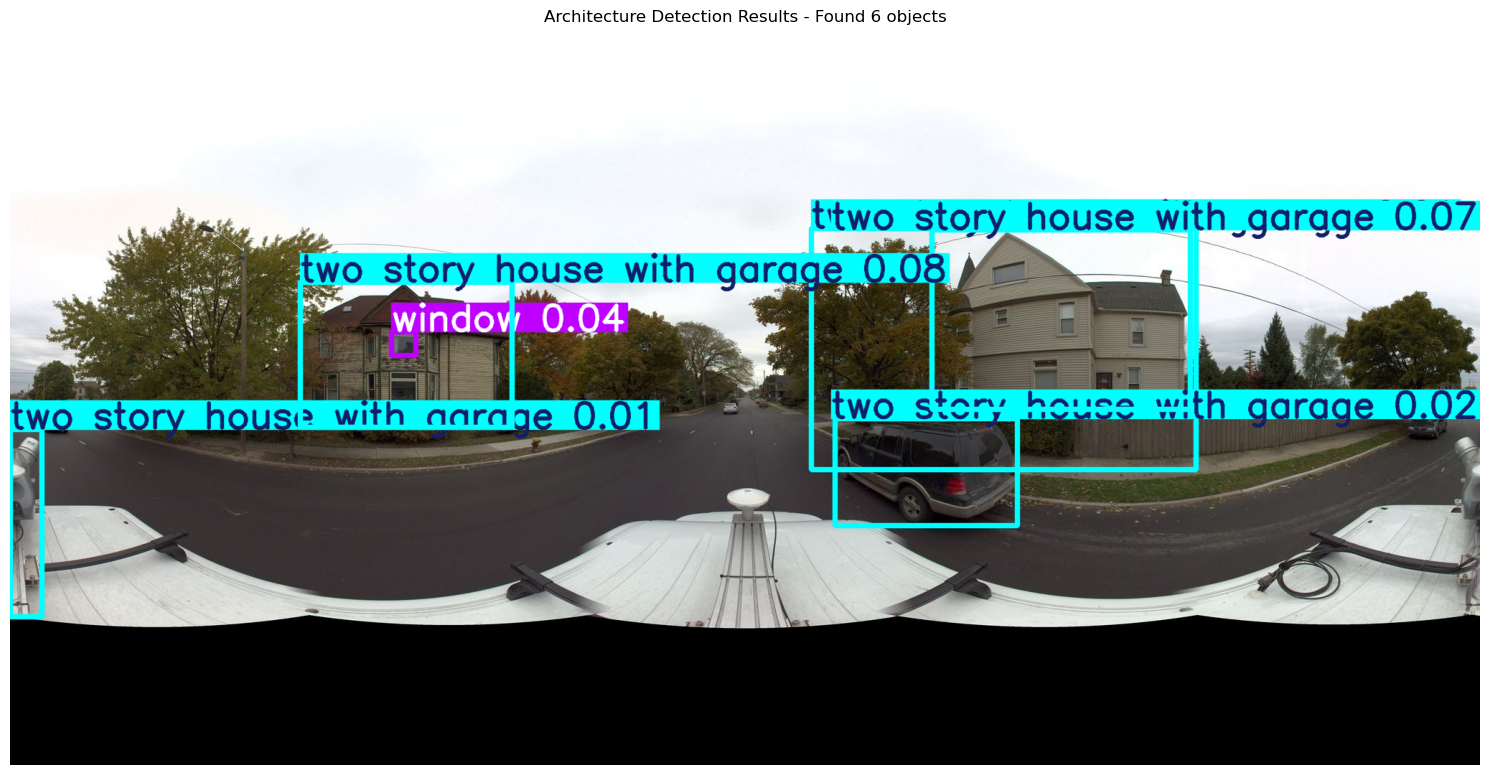

Annotated image saved as 'Forest_Ave_architecture.jpg'


In [48]:
# Architecture-focused detection with image display
import matplotlib.pyplot as plt
from PIL import Image

for r in arch_results:
    if r.boxes is not None:
        print(f"Architecture-focused detections: {len(r.boxes)} objects")
        
        # Print detection details
        for box in r.boxes:
            conf = float(box.conf[0])
            cls = int(box.cls[0])
            name = arch_classes[cls]
            print(f"  {name}: {conf:.3f}")
        
        # Display the image with bounding boxes
        im_array = r.plot()  # Get image with detection boxes drawn
        im = Image.fromarray(im_array[..., ::-1])  # Convert BGR to RGB
        
        plt.figure(figsize=(15, 10))
        plt.imshow(im)
        plt.axis('off')
        plt.title(f'Architecture Detection Results - Found {len(r.boxes)} objects')
        plt.tight_layout()
        plt.show()
        
        # Optional: Save the annotated image
        r.save('/Users/sunyao/desktop/Forest_Ave_architecture.jpg')
        print("Annotated image saved as 'Forest_Ave_architecture.jpg'")
        
    else:
        print("No architecture objects detected")
        
        # Still show the original image for reference
        import cv2
        original_img = cv2.imread('/Users/sunyao/desktop/Forest_Ave.jpg')
        original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(15, 10))
        plt.imshow(original_rgb)
        plt.axis('off')
        plt.title('Original Image - No Architecture Objects Detected')
        plt.tight_layout()
        plt.show()

Look into these:
YOLO (You Only Look Once) - Real-time detection
TensorFlow/Keras - Building custom models
PyTorch - Deep learning framework